In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import copy
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [123]:
#dataset_train=pd.read_csv('churn_rate_prediction.csv')
dataset_train=pd.read_csv('D:\churn_rate_prediction.csv')
dataset_train_copy=dataset_train.copy()

# Mục mới

# Mục mới

In [124]:
dataset_train_copy.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [125]:
dataset_train_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


# PREPROCESSING

In [150]:
# Removing In-significant features
df1 = dataset_train_copy.drop(['security_no','Name','referral_id','last_visit_time','customer_id'], axis=1)
df1.head(2)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


In [151]:
df1.isnull().sum().sum()

9159

In [152]:
df1['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [153]:
df1['gender'] = df1['gender'].replace('Unknown', np.nan)
df1['gender'].value_counts()

gender
F    18490
M    18443
Name: count, dtype: int64

In [154]:
df1['region_category'].value_counts()

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [155]:
df1['medium_of_operation'] = df1['medium_of_operation'].replace('?', np.nan)
df1['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
Both           3810
Name: count, dtype: int64

In [156]:
df1['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [157]:
df1['used_special_discount'].value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [158]:
df1['past_complaint'].value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [159]:
df1['feedback'].value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [160]:
df1.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [161]:
df1['avg_frequency_login_days'] = df1['avg_frequency_login_days'].replace('Error', np.nan)
df1['avg_frequency_login_days'].value_counts()

avg_frequency_login_days
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
17.0                   1349
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: count, Length: 1653, dtype: int64

In [162]:
df1['avg_frequency_login_days'] = df1['avg_frequency_login_days'].astype('float64')

In [163]:
df1['joining_date'] = pd.to_datetime(df1['joining_date'], format='%Y-%m-%d')

In [164]:
df1['days_since_joined'] = df1['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)

In [165]:
df1.drop('joining_date', axis=1, inplace=True)

In [167]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
avg_frequency_login_days,33470.0,15.976715,9.215858,-43.652702,9.0000,16.000,23.000,73.061995
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000
days_since_joined,36992.0,2545.793063,317.860926,2001.000000,2270.0000,2545.000,2823.000,3096.000000


In [168]:
df1.isnull().sum() / dataset_train_copy.shape[0] * 100

age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joined_through_referral          0.000000
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.520978
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
days_since_joined                0.000000
dtype: float64

In [169]:
df1.shape

(36992, 20)

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36933 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   medium_of_operation           31599 non-null  object 
 7   internet_option               36992 non-null  object 
 8   days_since_last_login         36992 non-null  int64  
 9   avg_time_spent                36992 non-null  float64
 10  avg_transaction_value         36992 non-null  float64
 11  avg_frequency_login_days      33470 non-null  float64
 12  points_in_wallet              33549 non-null  float64
 13  u

# Visualization

In [171]:
data_visual = df1.copy()
categorical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype == "O"]
numerical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype != "O"]

In [172]:
print('Categorical columns: ',categorical_cols)
print('Numerical columns: ',numerical_cols)

Categorical columns:  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical columns:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'days_since_joined']


In [173]:
categorical_cols = np.array(categorical_cols).reshape(6,2)

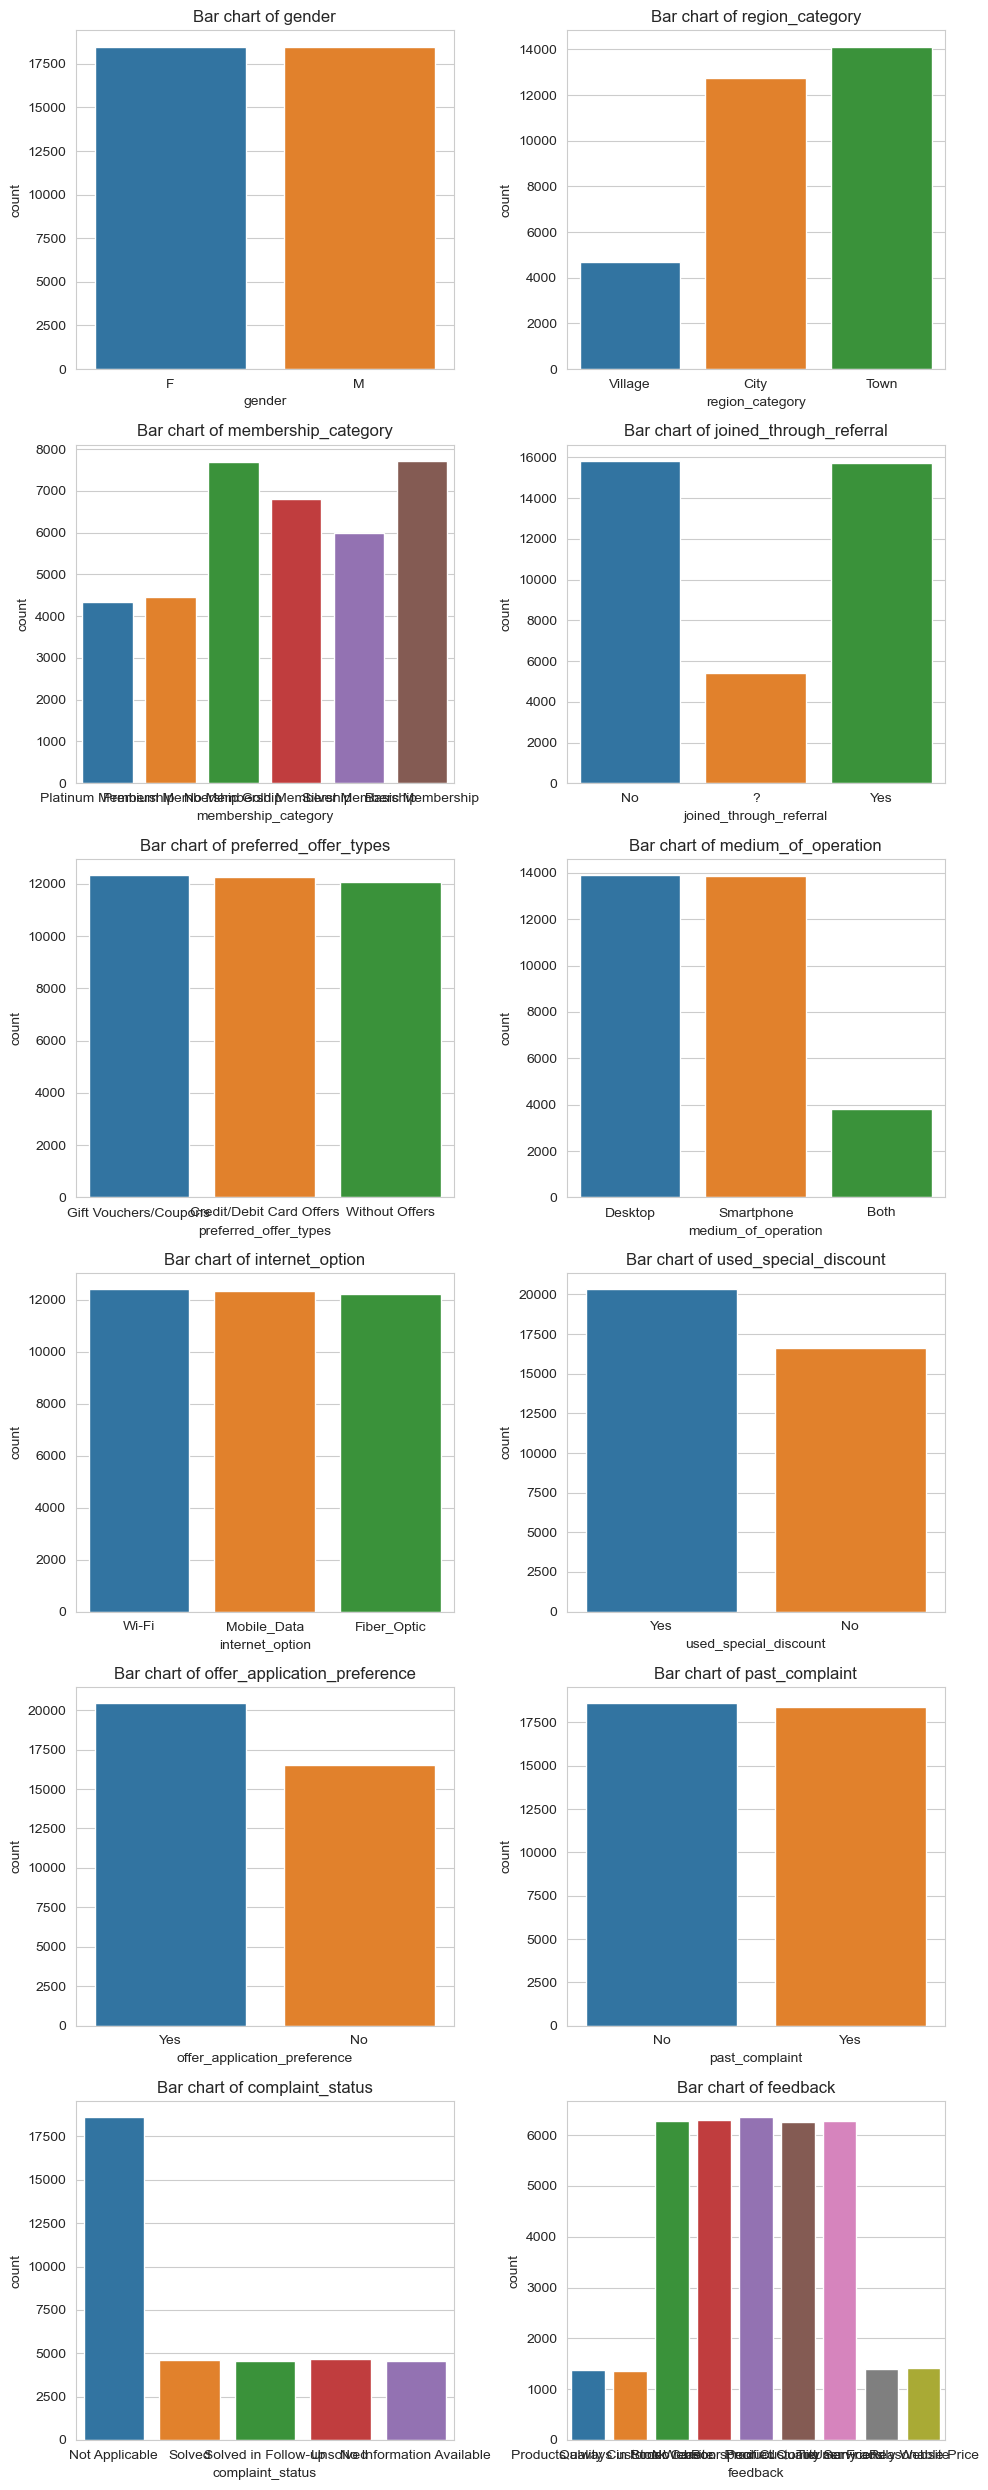

In [174]:
fig, ax = plt.subplots(categorical_cols.shape[0], categorical_cols.shape[1], figsize = (10,25))

for i in range(categorical_cols.shape[0]):
    for j in range(categorical_cols.shape[1]):
        if categorical_cols[i, j] == '':
            continue
        sns.countplot(data = data_visual, x = categorical_cols[i,j], ax = ax[i, j])
        ax[i, j].set_title('Bar chart of ' + categorical_cols[i,j])

plt.tight_layout()
plt.show()

In [180]:
numerical_cols = np.array(numerical_cols).reshape(4, 2)

<AxesSubplot:>

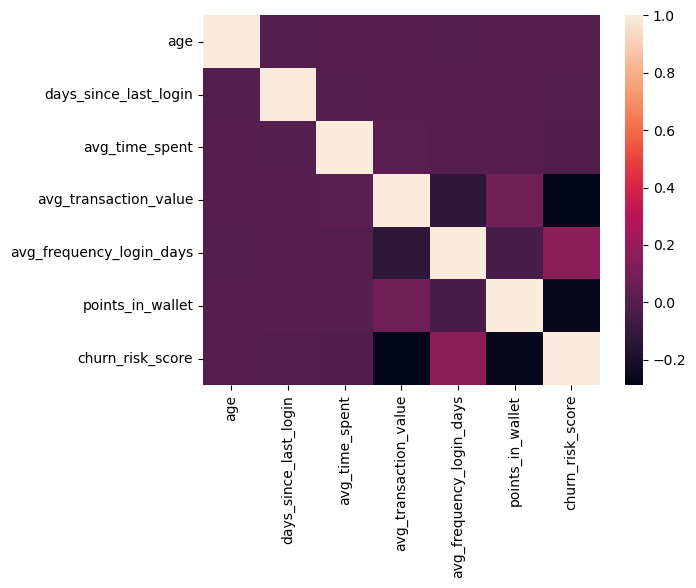

In [33]:
sns.heatmap(data_visual[numerical_cols].corr())

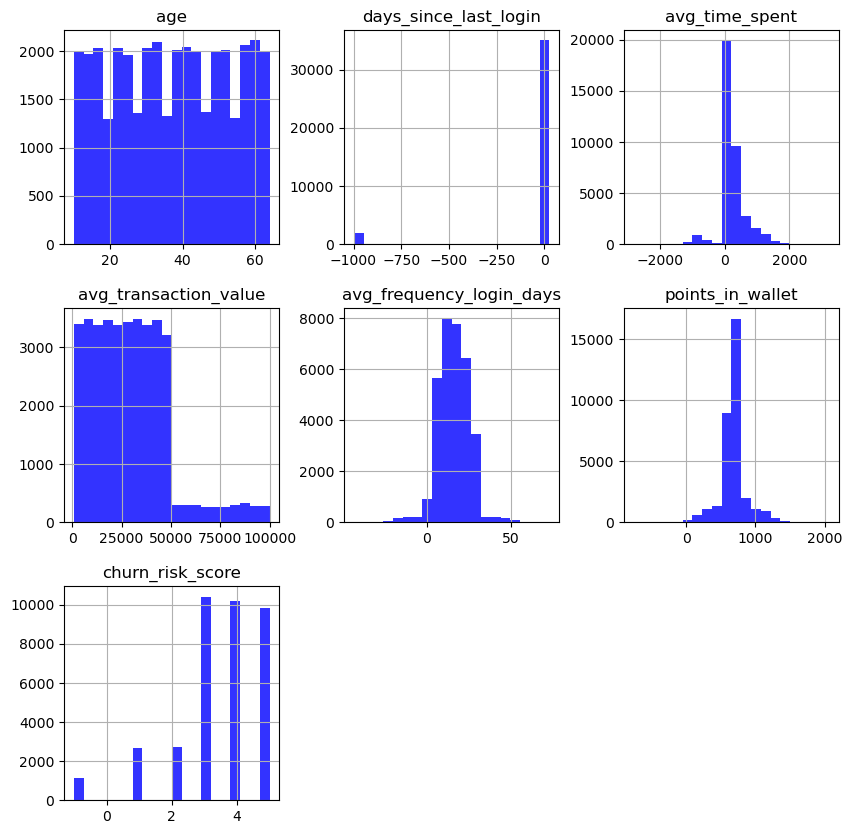

In [34]:
data_visual.hist(figsize=(10, 10),grid=True,bins=20,alpha=0.8,color='blue')
plt.show()

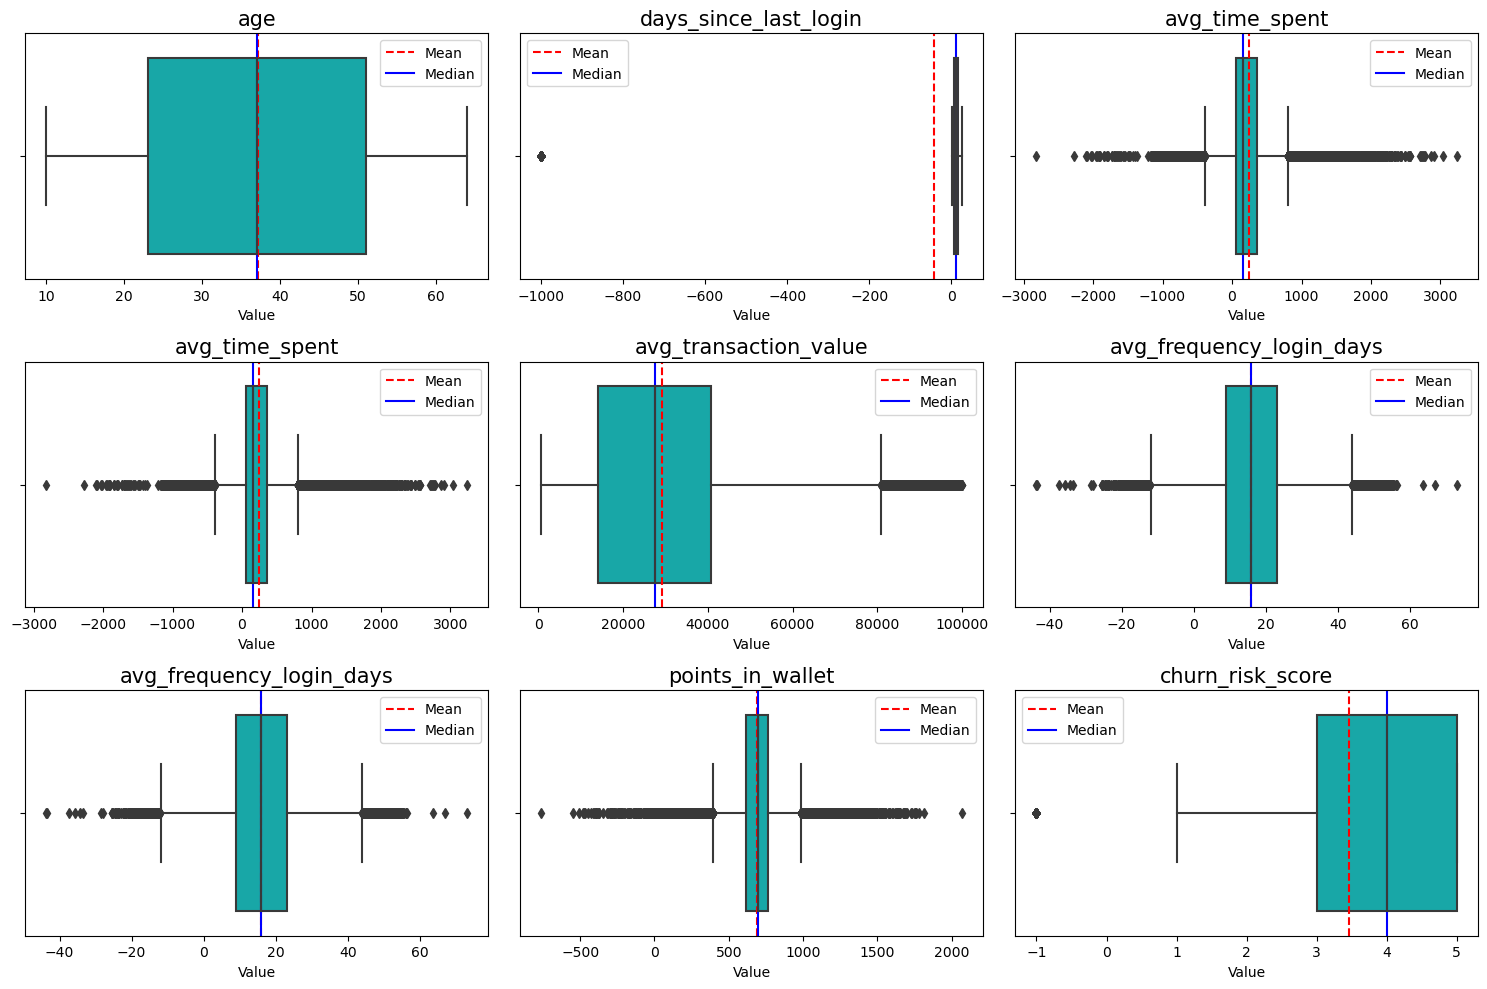

In [35]:
numeric_cols = data_visual.select_dtypes(include='number').columns
numeric_cols
def boxplot_numerical_features(data_visual, continous_columns):
    l = len(continous_columns)
    n = 3
    row = lambda l, n: int(l/n) if l%n==0 else int(int(l/n)+1)
    m = row(l, n)
    # set position for figure
    fig , ax = plt.subplots(m,n, figsize=(15,10))
    if ( m <= 1):
        for j in range(n):
            index = j
            if index >= len(continous_columns):
                break
            mean = data_visual[continous_columns[index]].describe()['mean']
            median = data_visual[continous_columns[index]].describe()['50%']
            sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[index], color='c')
            ax[index].axvline(mean, label='Mean', color='r', linestyle='dashed')
            ax[index].axvline(median, label='Median', color='b')
            ax[index].set_title(f"{continous_columns[index]}", fontsize=15)
            ax[index].set_xlabel('Value')
            ax[index].legend()
    else:
        for i in range(m):
            for j in range(n):
                index = 2*i + j
                if index >= len(continous_columns):
                    break
                mean = data_visual[continous_columns[index]].describe()['mean']
                median = data_visual[continous_columns[index]].describe()['50%']
                sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[i, j], color='c')
                ax[i, j].axvline(mean, label='Mean', color='r', linestyle='dashed')
                ax[i, j].axvline(median, label='Median', color='b')
                ax[i, j].set_title(f"{continous_columns[index]}", fontsize=15)
                ax[i, j].set_xlabel('Value')
                ax[i, j].legend()
    plt.tight_layout()
    plt.show()
boxplot_numerical_features(data_visual, numeric_cols)

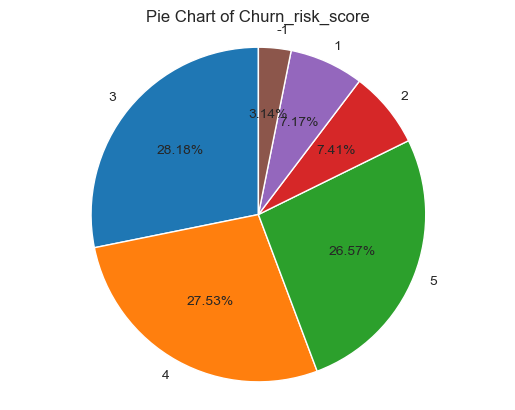

In [39]:
label_target = dataset_train_copy['churn_risk_score'].value_counts().index.to_list()
plt.pie(dataset_train_copy['churn_risk_score'].value_counts(), labels=label_target, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Churn_risk_score')
plt.show()

In [ ]:
dataset_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13368 entries, 0 to 13367
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   13368 non-null  object 
 1   Name                          13368 non-null  object 
 2   age                           13368 non-null  int64  
 3   gender                        13368 non-null  object 
 4   security_no                   13368 non-null  object 
 5   region_category               11357 non-null  object 
 6   membership_category           13367 non-null  object 
 7   joining_date                  13367 non-null  object 
 8   joined_through_referral       13367 non-null  object 
 9   referral_id                   13367 non-null  object 
 10  preferred_offer_types         13271 non-null  object 
 11  medium_of_operation           13367 non-null  object 
 12  internet_option               13367 non-null  object 
 13  l

In [ ]:
# Check for NaN data
display(dataset_train_copy.isnull().sum())

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2011
membership_category                1
joining_date                       1
joined_through_referral            1
referral_id                        1
preferred_offer_types             97
medium_of_operation                1
internet_option                    1
last_visit_time                    1
days_since_last_login              1
avg_time_spent                     1
avg_transaction_value              1
avg_frequency_login_days           1
points_in_wallet                1226
used_special_discount              1
offer_application_preference       1
past_complaint                     1
complaint_status                   1
feedback                           1
churn_risk_score                   1
dtype: int64

In [ ]:
# Dropping all rows whose 'avg_time_spent' is negative
low = np.where(dataset_train_copy['avg_time_spent'] < 0)
dataset_train_copy.drop(low[0],inplace=True)
# Reseting the default index
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'points_in_wallet' is negative
l1 = np.where(dataset_train_copy['points_in_wallet'] < 0)
dataset_train_copy.drop(l1[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'avg_transaction_value' is negative
l2 = np.where(dataset_train_copy['avg_transaction_value'] < 0)
dataset_train_copy.drop(l2[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'days_since_last_login' is negative
l3 = np.where(dataset_train_copy['days_since_last_login'] < 0)
dataset_train_copy.drop(l3[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Removing all the rows having 'churn_risk_score' == -1
l4 = np.where(dataset_train_copy['churn_risk_score'] == -1)
dataset_train_copy.drop(l4[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

In [ ]:
# class distribution
print(dataset_train_copy.groupby('churn_risk_score').size())

churn_risk_score
1.0     865
2.0     924
3.0    3383
4.0    3176
5.0    3257
dtype: int64


In [ ]:
dataset_train_copy=dataset_train_copy.fillna(method='ffill')  #Filling Null values using Forward Fill Method

In [ ]:
display(dataset_train_copy.isnull().sum())

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [ ]:
print(dataset_train_copy['membership_category'].value_counts())

No Membership          2475
Basic Membership       2405
Gold Membership        2108
Silver Membership      1855
Platinum Membership    1390
Premium Membership     1373
Name: membership_category, dtype: int64


In [ ]:
dataset_train_encoded = dataset_train_copy.copy()
categ = ['gender','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','region_category','membership_category','avg_frequency_login_days','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']
encoder = LabelEncoder()
dataset_train_encoded[categ] = dataset_train_encoded[categ].apply(encoder.fit_transform)
dataset_train_encoded.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,3,3,2017-08-17,1,xxxxxxxx,...,300.63,53005.25,237,781.75,1,1,0,1,4,2.0
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,4,2017-08-28,0,CID21329,...,306.34,12838.38,230,781.75,1,0,1,2,5,1.0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,2,2,2016-11-11,2,CID12313,...,516.16,21027.00,251,500.69,0,1,1,3,3,5.0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,2,CID3793,...,53.27,25239.56,492,567.66,0,1,1,4,3,5.0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,1,xxxxxxxx,...,113.13,24483.66,236,663.06,0,1,1,2,3,5.0


In [ ]:
print(encoder.classes_)

['No reason specified' 'Poor Customer Service' 'Poor Product Quality'
 'Poor Website' 'Products always in Stock' 'Quality Customer Care'
 'Reasonable Price' 'Too many ads' 'User Friendly Website']


In [ ]:
corr=dataset_train_encoded.corr()["churn_risk_score"].abs().sort_values(ascending=False)
corr

<ipython-input-54-56432c08883c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset_train_encoded.corr()["churn_risk_score"].abs().sort_values(ascending=False)


churn_risk_score                1.000000
membership_category             0.440466
avg_transaction_value           0.364952
feedback                        0.343510
points_in_wallet                0.305819
preferred_offer_types           0.049459
days_since_last_login           0.039470
offer_application_preference    0.037871
past_complaint                  0.031596
avg_frequency_login_days        0.028165
avg_time_spent                  0.024641
joined_through_referral         0.020649
region_category                 0.020560
gender                          0.018694
complaint_status                0.018266
used_special_discount           0.014988
medium_of_operation             0.012766
internet_option                 0.003145
age                             0.000537
Name: churn_risk_score, dtype: float64

In [67]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data

def imputate_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], lower_bound)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    mean = data[feature].median() # median = df['column'].median()
    data.loc[data[feature] < lower_extreme, feature] = Q1 # or mean
    data.loc[data[feature] > upper_extreme, feature] = Q3 # or mean

    return data

In [68]:
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_transaction_value', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_frequency_login_days', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_time_spent', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'points_in_wallet', 0.25, 0.75)

Percent of outlier in avg_transaction_value : 3.2483198345683264
Percent of outlier in avg_frequency_login_days : 0.0
Percent of outlier in avg_time_spent : 8.522575474218542
Percent of outlier in points_in_wallet : 12.860202492211839


In [69]:
#split dataset in features and target variable
feature_cols = ['region_category','membership_category',
'avg_time_spent',
'avg_transaction_value',
'points_in_wallet','complaint_status',
'feedback'
]
X = dataset_train_encoded[feature_cols] # Features
y = dataset_train_encoded.churn_risk_score # Target variable

In [70]:
X

,region_category,membership_category,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status,feedback
0,3,3,300.63,53005.25,781.75,1,4
1,0,4,306.34,12838.38,781.75,2,5
2,2,2,516.16,21027.00,500.69,3,3
3,0,2,53.27,25239.56,567.66,4,3
4,0,2,113.13,24483.66,663.06,2,3
...,...,...,...,...,...,...,...
11600,2,4,261.14,9695.07,805.03,0,6
11602,2,5,550.04,44251.81,636.22,1,2
11603,2,0,124.52,10074.99,613.71,1,0
11604,0,3,290.84,55568.27,739.09,3,8


In [71]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
import lightgbm as lgb

In [73]:
# Applying SMOTEN Over Sampling Strategy
from imblearn.over_sampling import SMOTEN
oversampler = SMOTEN()
X_ov,y_ov = oversampler.fit_resample(X,y)
print('The dataset before oversampling: ',X.shape,y.shape)
print('The dataset after oversampling: ',X_ov.shape,y_ov.shape)

The dataset before oversampling:  (8951, 7) (8951,)
The dataset after oversampling:  (13535, 7) (13535,)


In [74]:
# Now we are having equally balanced target labels
print(sum(y == 1),sum(y_ov == 1))
print(sum(y == 2),sum(y_ov == 2))
print(sum(y == 3),sum(y_ov == 3))
print(sum(y == 4),sum(y_ov == 4))
print(sum(y == 5),sum(y_ov == 5))

540 2707
583 2707
2707 2707
2519 2707
2602 2707


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.3, random_state=42) # 70% training and 30% test

In [78]:
# Decision Tree Classifier
dt=DecisionTreeClassifier(min_samples_split=100,random_state = 1)
dt=dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred)*100)

Accuracy: 83.35385373060824


In [79]:
# Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=1000,max_depth=25)
rfc=rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred)*100)

Accuracy: 84.8313223344004


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test là dữ liệu huấn luyện và kiểm tra

# Tạo pipeline gồm các bước tiền xử lý và mô hình SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Tiêu chuẩn hóa dữ liệu
    ('svm', SVC(kernel='rbf'))  # Mô hình SVM với kernel tuyến tính
])

# Huấn luyện mô hình trên tập huấn luyện
pipeline.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7227283920216695
